<IPython.core.display.Javascript object>


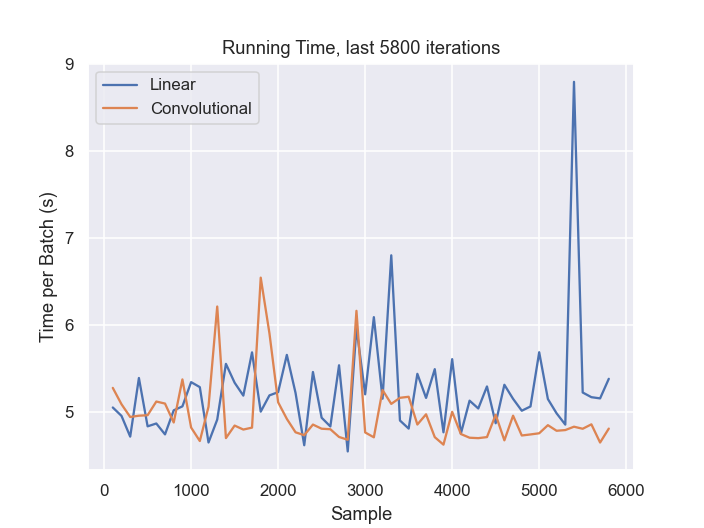

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def parse_data(path):
    fh = open(path)
    count = 0
    times = []
    losses = []
    r_losses = []
    samples = []
    for line in fh:
        if count %2 == 0:
            sample, time = line.split()
            times.append(float(time))
            samples.append(int(sample))
        else:
            loss, r_loss = line.split()
            loss = float(loss[:-1])
            r_loss = float(r_loss)
            losses.append(loss)
            r_losses.append(r_loss)
        count += 1
    fh.close()
    return times, losses, r_losses, samples

lin_t, lin_l, lin_rl, lin_samps = parse_data('./data/lin_res.txt')
con_t, con_l, con_rl, con_samps = parse_data('./data/conv_res.txt')

%matplotlib notebook
plt.figure()
plt.title('Running Time, last 5800 iterations')
plt.plot(lin_samps, lin_t, label="Linear")
plt.plot(con_samps, con_t, label='Convolutional')
plt.xlabel('Iteration')
plt.ylabel('Time per Batch (s)')
plt.legend()

<IPython.core.display.Javascript object>


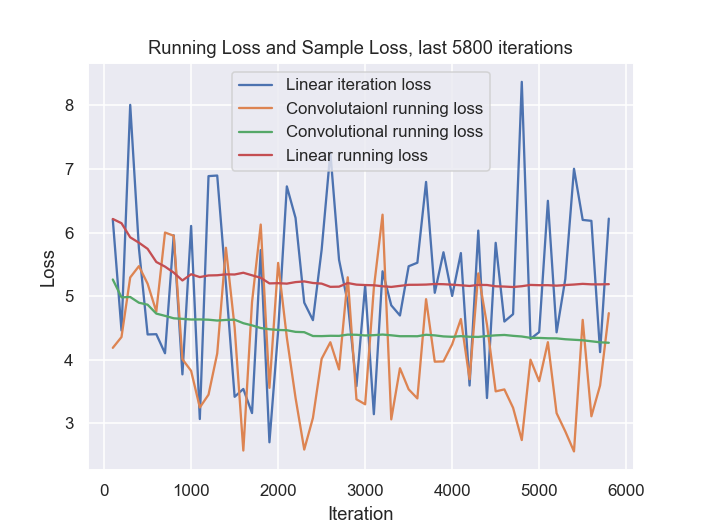

In [19]:
plt.figure()
plt.title('Running Loss and Sample Loss, last 5800 iterations')
plt.plot(lin_samps, lin_l, label='Linear iteration loss')
plt.plot(con_samps, con_l, label='Convolutaionl running loss')
plt.plot(con_samps, con_rl, label='Convolutional running loss')
plt.plot(lin_samps, lin_rl, label='Linear running loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [13]:
import numpy as np
print(np.mean(con_t), np.mean(lin_t))

4.9694350711230575 5.24874054974523


In [14]:
print(np.std(con_t), np.std(lin_t))

0.38195402207532353 0.6061622025599567


In [28]:
from scipy.stats import ttest_ind
t2, p2 = ttest_ind(lin_t,con_t)
print('time')
print("t = " + str(t2))
print("p = " + str(p2))
t2, pe = ttest_ind(lin_l, con_l)
print('loss')
print(f't = {t2}')
print(f'p = {p2}')

time
t = 2.94321615712168
p = 0.003936528426132776
loss
t = 5.028972547324645
p = 0.003936528426132776


<IPython.core.display.Javascript object>


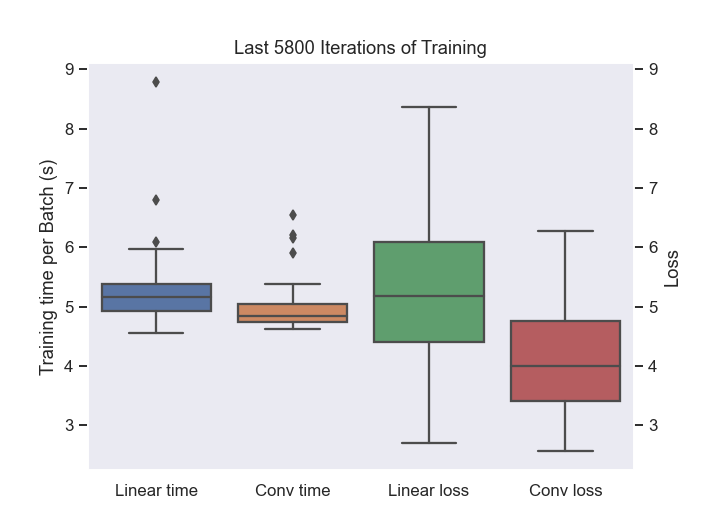

Text(0.5, 1.0, 'Last 5800 Iterations of Training')

In [27]:
plt.figure()
sns.set_style('dark')
ax = sns.boxplot(data=[lin_t, con_t, lin_l, con_l])
ax.set_xticklabels(['Linear time', 'Conv time', 'Linear loss', 'Conv loss'])
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel('Loss')
ax.set_ylabel('Training time per Batch (s)')
plt.title('Last 5800 Iterations of Training')

<IPython.core.display.Javascript object>


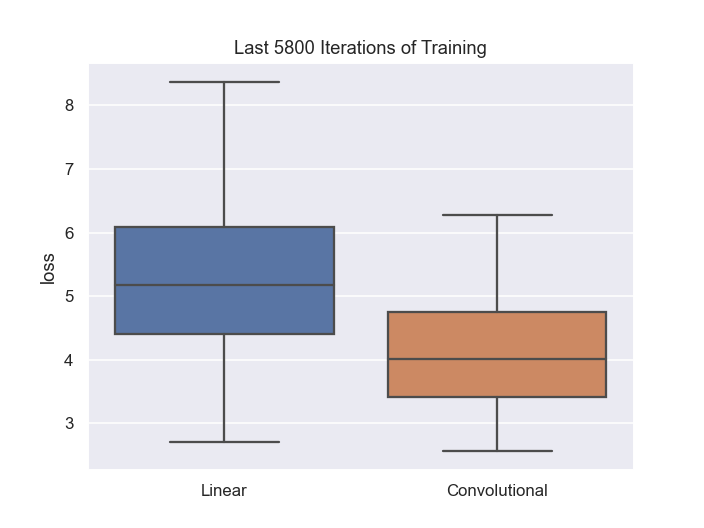

Text(0.5, 1.0, 'Last 5800 Iterations of Training')

In [23]:
plt.figure()
ax = sns.boxplot(data=[lin_l, con_l])
ax.set_xticklabels(['Linear', 'Convolutional'])
ax.set_ylabel('loss')
plt.title('Last 5800 Iterations of Training')